# Lecture 3
_____________

## _Sequent peak method_
#### Sequent peak example from LVB Table 11.2

In [1]:
# if running on Colab, copy data from Github
import sys
if 'google.colab' in sys.modules:
    !git clone https://github.com/jdherman/eci273.git
    %cd eci273

Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300


`tile` copies an array a number of times

In [3]:
Q = np.tile([1, 3, 3, 5, 8, 6, 7, 2, 1], 2)
print(Q)

[1 3 3 5 8 6 7 2 1 1 3 3 5 8 6 7 2 1]


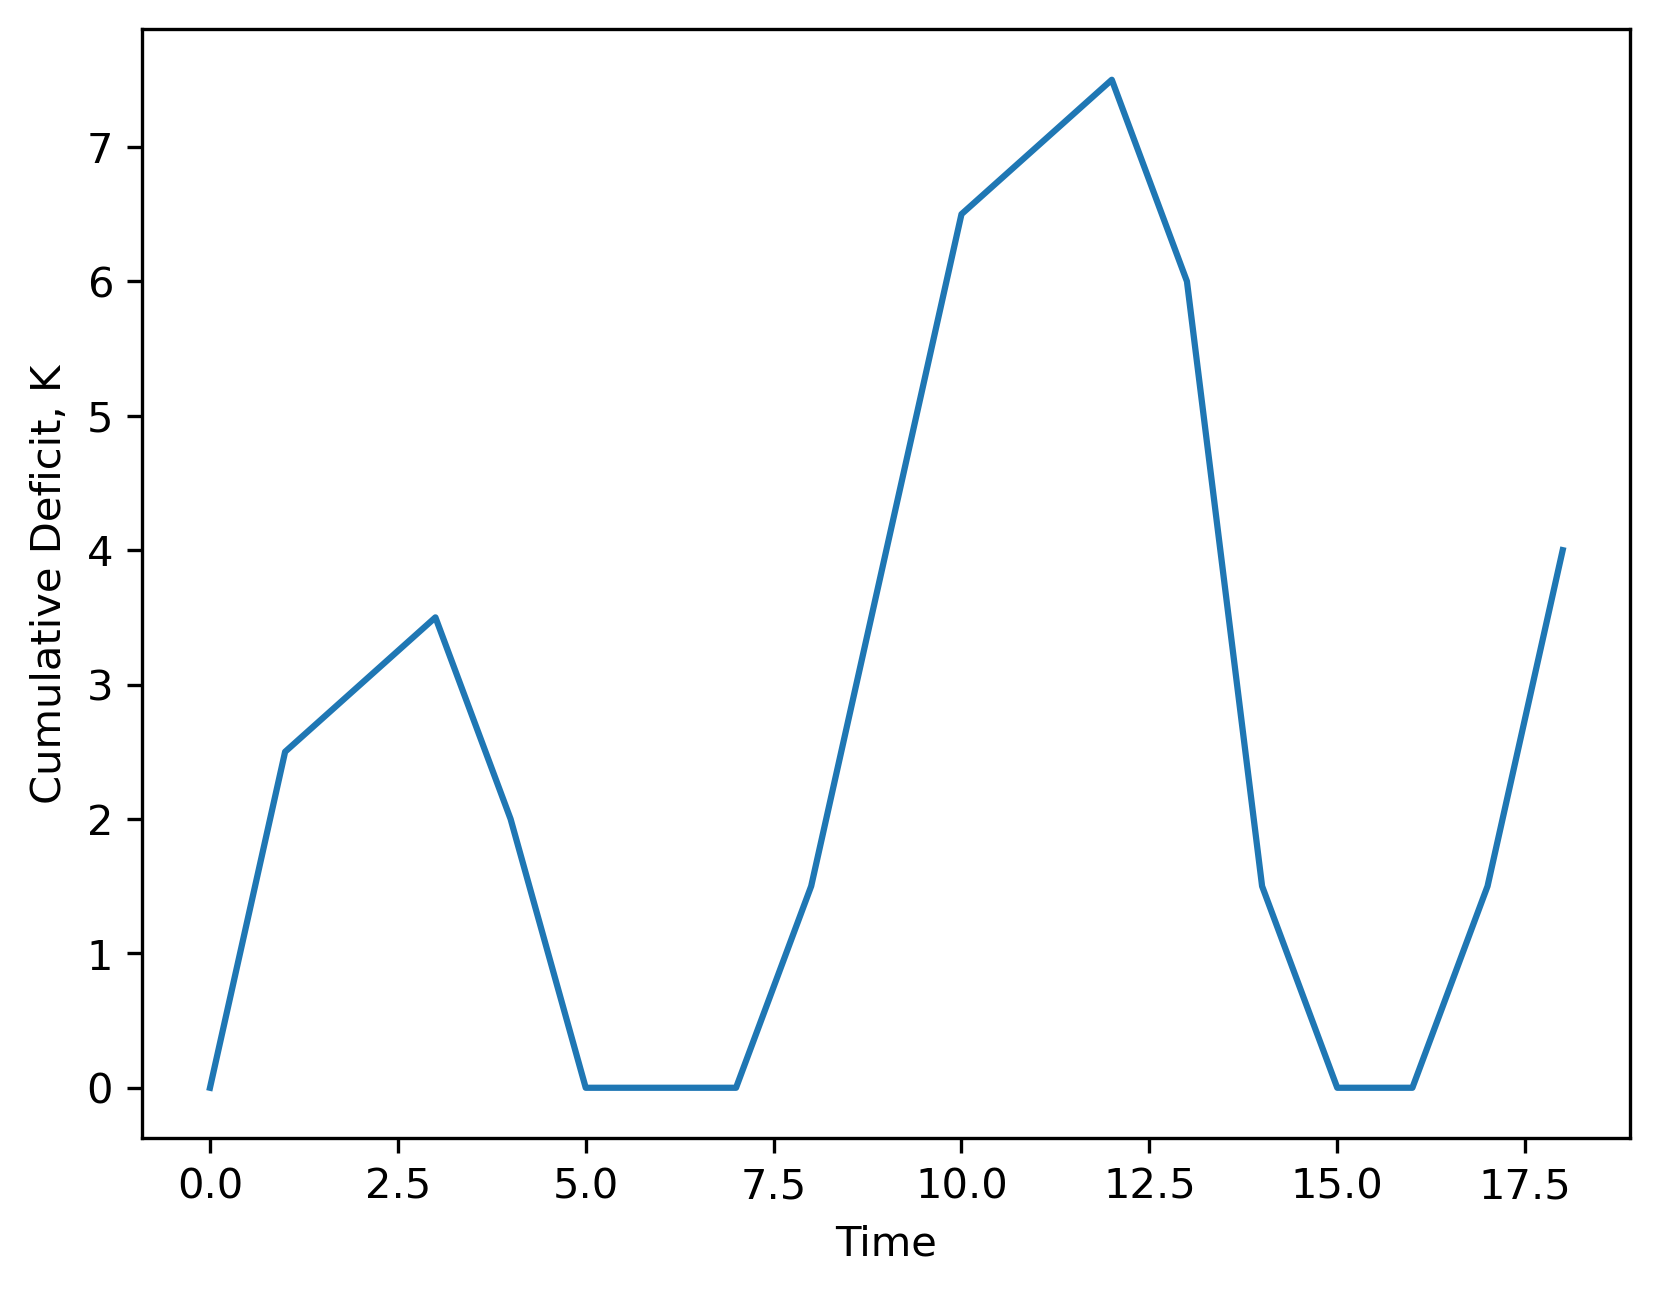

Reservoir size needed: 7.500000


In [4]:
T = len(Q) # timestep is the length of number of inflows
K = np.zeros(T+1) # reservoir capacity
R = 3.5*np.ones(T) # target demand/release

for t in range(T):
    K[t+1] = max(R[t] - Q[t] + K[t], 0) # if negative, we keep 0 instead

plt.plot(K)
plt.ylabel('Cumulative Deficit, K')
plt.xlabel('Time')
plt.show()

print('Reservoir size needed: %f' % np.max(K))

Or, write as a function instead

In [5]:
def sequent_peak(R, Q):
    # accepts inflow and outflow arrays
    # returns sequent peak reservoir capacity
    assert len(R) == len(Q), 'R and Q must be the same length' # assert that it's true, if false print that statement

    T = len(Q)
    K = np.zeros(T+1)

    for t in range(T):
        K[t+1] = max(R[t] - Q[t] + K[t], 0)

    return np.max(K) # at the end return the capacity value


In [6]:
Kmax = sequent_peak(R,Q)
print(Kmax)

7.5


### Example with real data - Oroville

- Load FTO-FNF.csv (monthly inflow to Oroville WY 1906-2020)
- Use sequent peak method to find storage needed to meet 200 TAF/month demand with 100% reliability

In [7]:
Q = np.loadtxt('data/FTO-FNF.csv', delimiter=',', skiprows=1, usecols=[1])

In [8]:
Q = Q / 1000 # AF to TAF
T = len(Q)
R = 200 * np.ones(T)
print(R)

[200. 200. 200. ... 200. 200. 200.]


In [9]:
Kmax = sequent_peak(R, Q)
print('Reservoir size to meet constant 200 TAF/month demand:', Kmax, 'TAF')

Reservoir size to meet constant 200 TAF/month demand: 2369.25 TAF


#### Flood pool sizing
Same method but signs flipped. Use daily data for Oroville 1997 flood event. Use maximum release of 130,000 cfs.

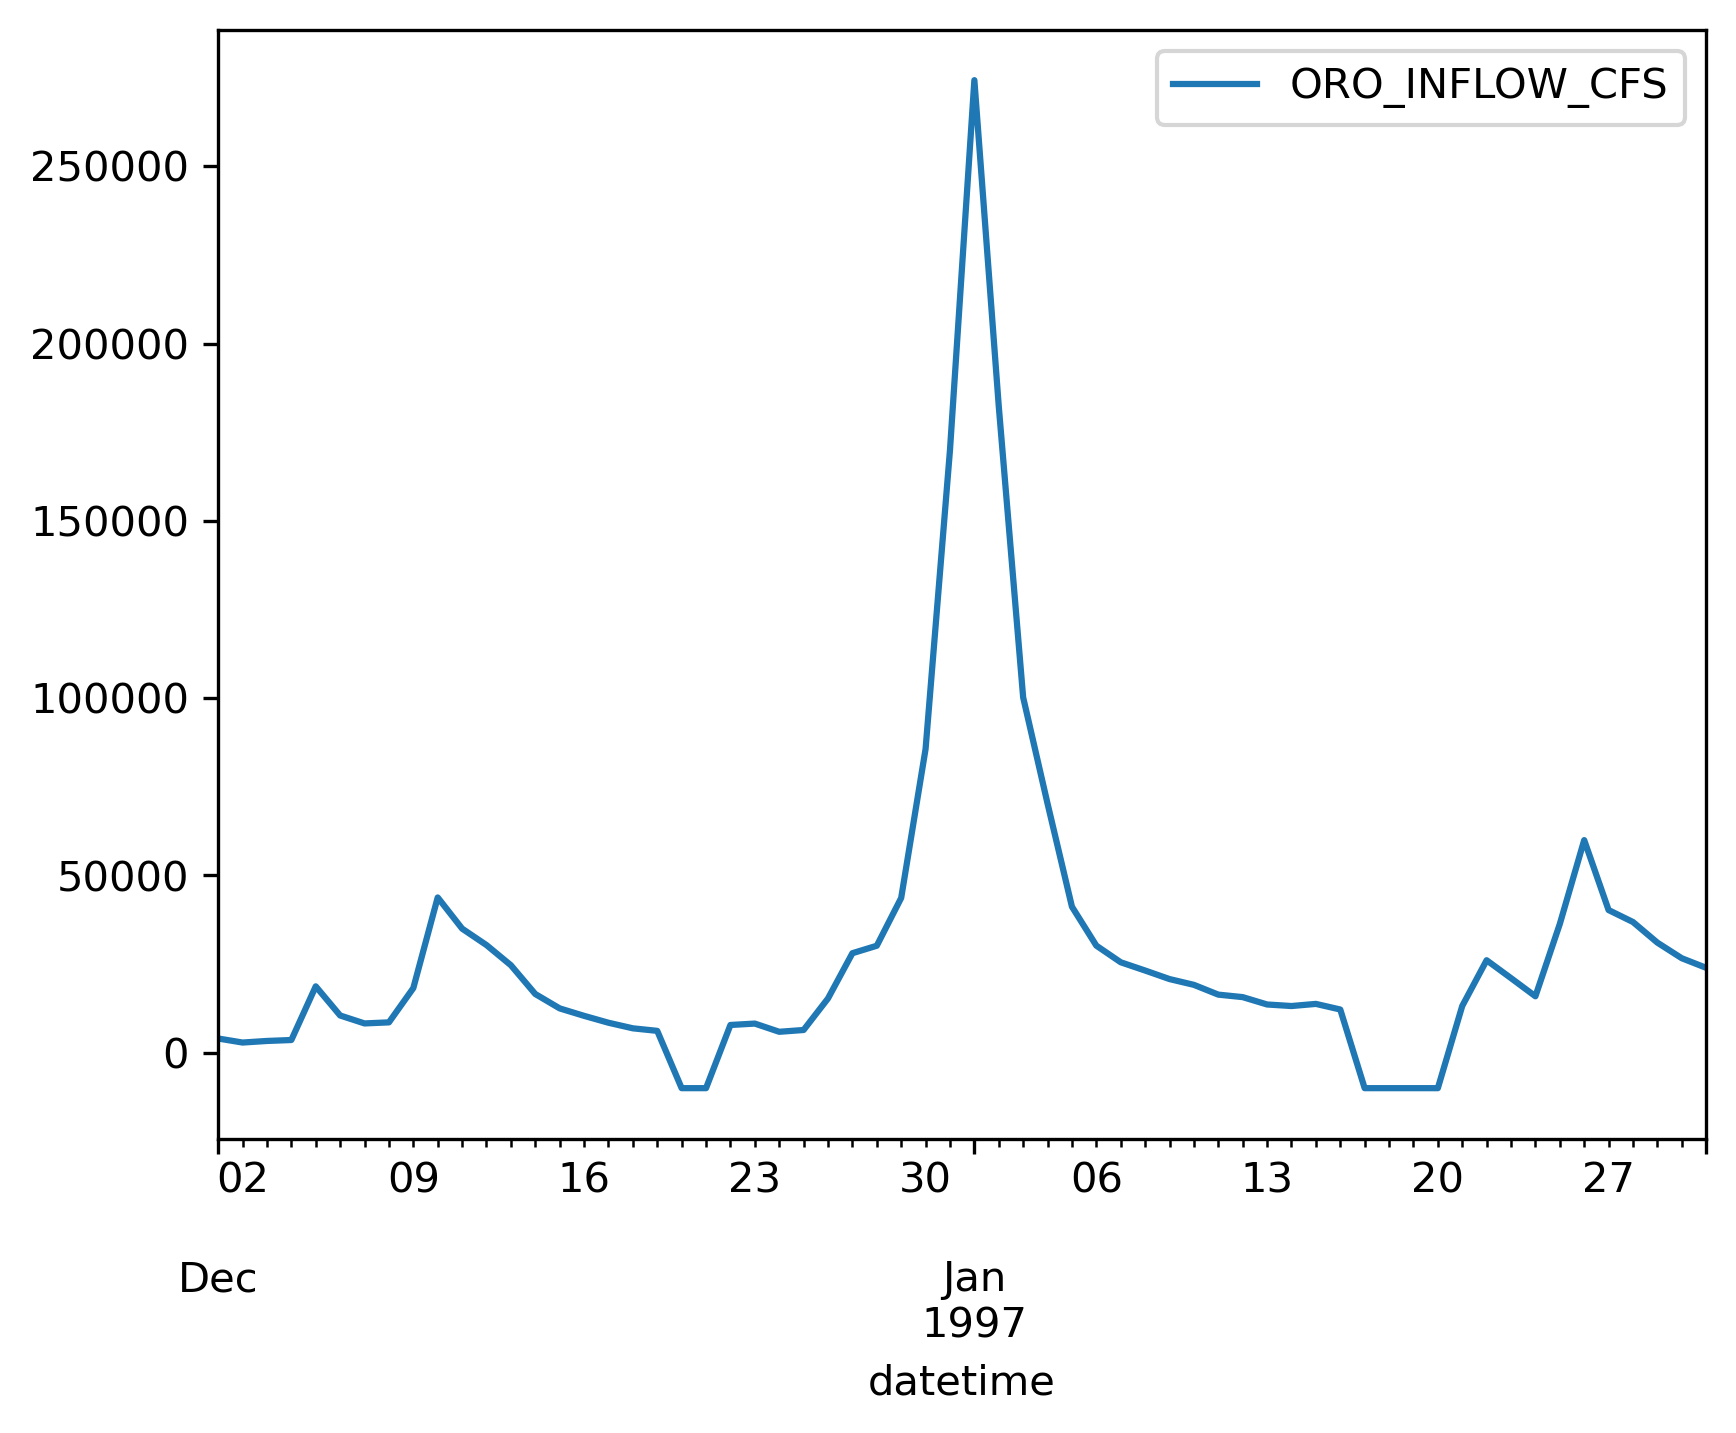

In [10]:
from cdec_scraper import cdec_sensor_data
cfs_to_tafd = 2.29568411*10**-5 * 86400 / 1000

df = cdec_sensor_data('ORO', 76, 'D', sd='1996-12-01', ed='1997-01-31')
# returns a pandas dataframe
df.plot()
plt.show()

In [11]:
Q = df.values[:,0] * cfs_to_tafd # to numpy


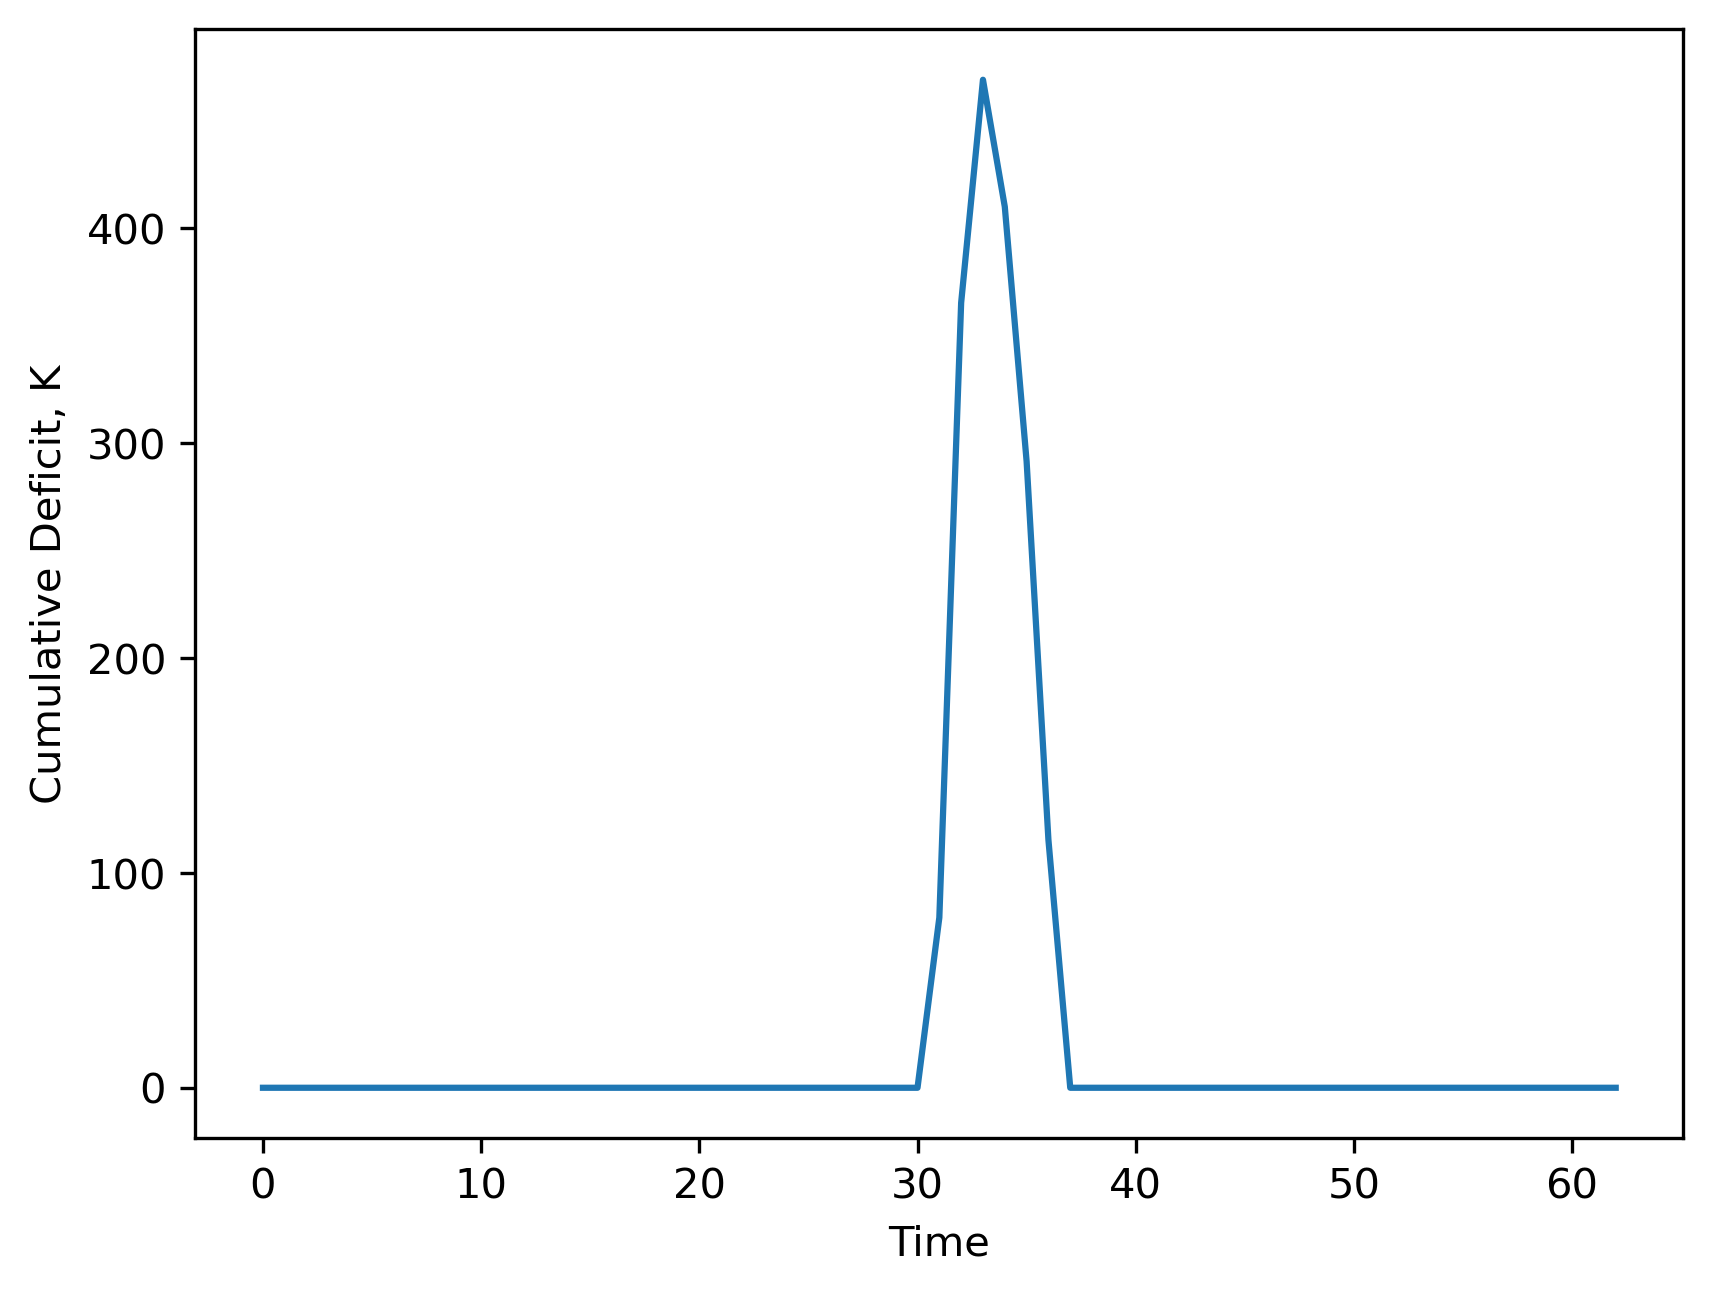

Flood pool size needed: 469.148429 TAF


In [12]:
T = len(Q) # timestep is the length of number of inflows
K = np.zeros(T+1) # reservoir capacity
R = (130000 * cfs_to_tafd)*np.ones(T) # target demand/release

# same as above but Q-R
for t in range(T):
    K[t+1] = max(Q[t] - R[t] + K[t], 0) # if negative, keep 0 instead

plt.plot(K)
plt.ylabel('Cumulative Deficit, K')
plt.xlabel('Time')
plt.show()

print('Flood pool size needed: %f TAF' % np.max(K))

A larger flood pool was needed during the event due to ramping rate limits:

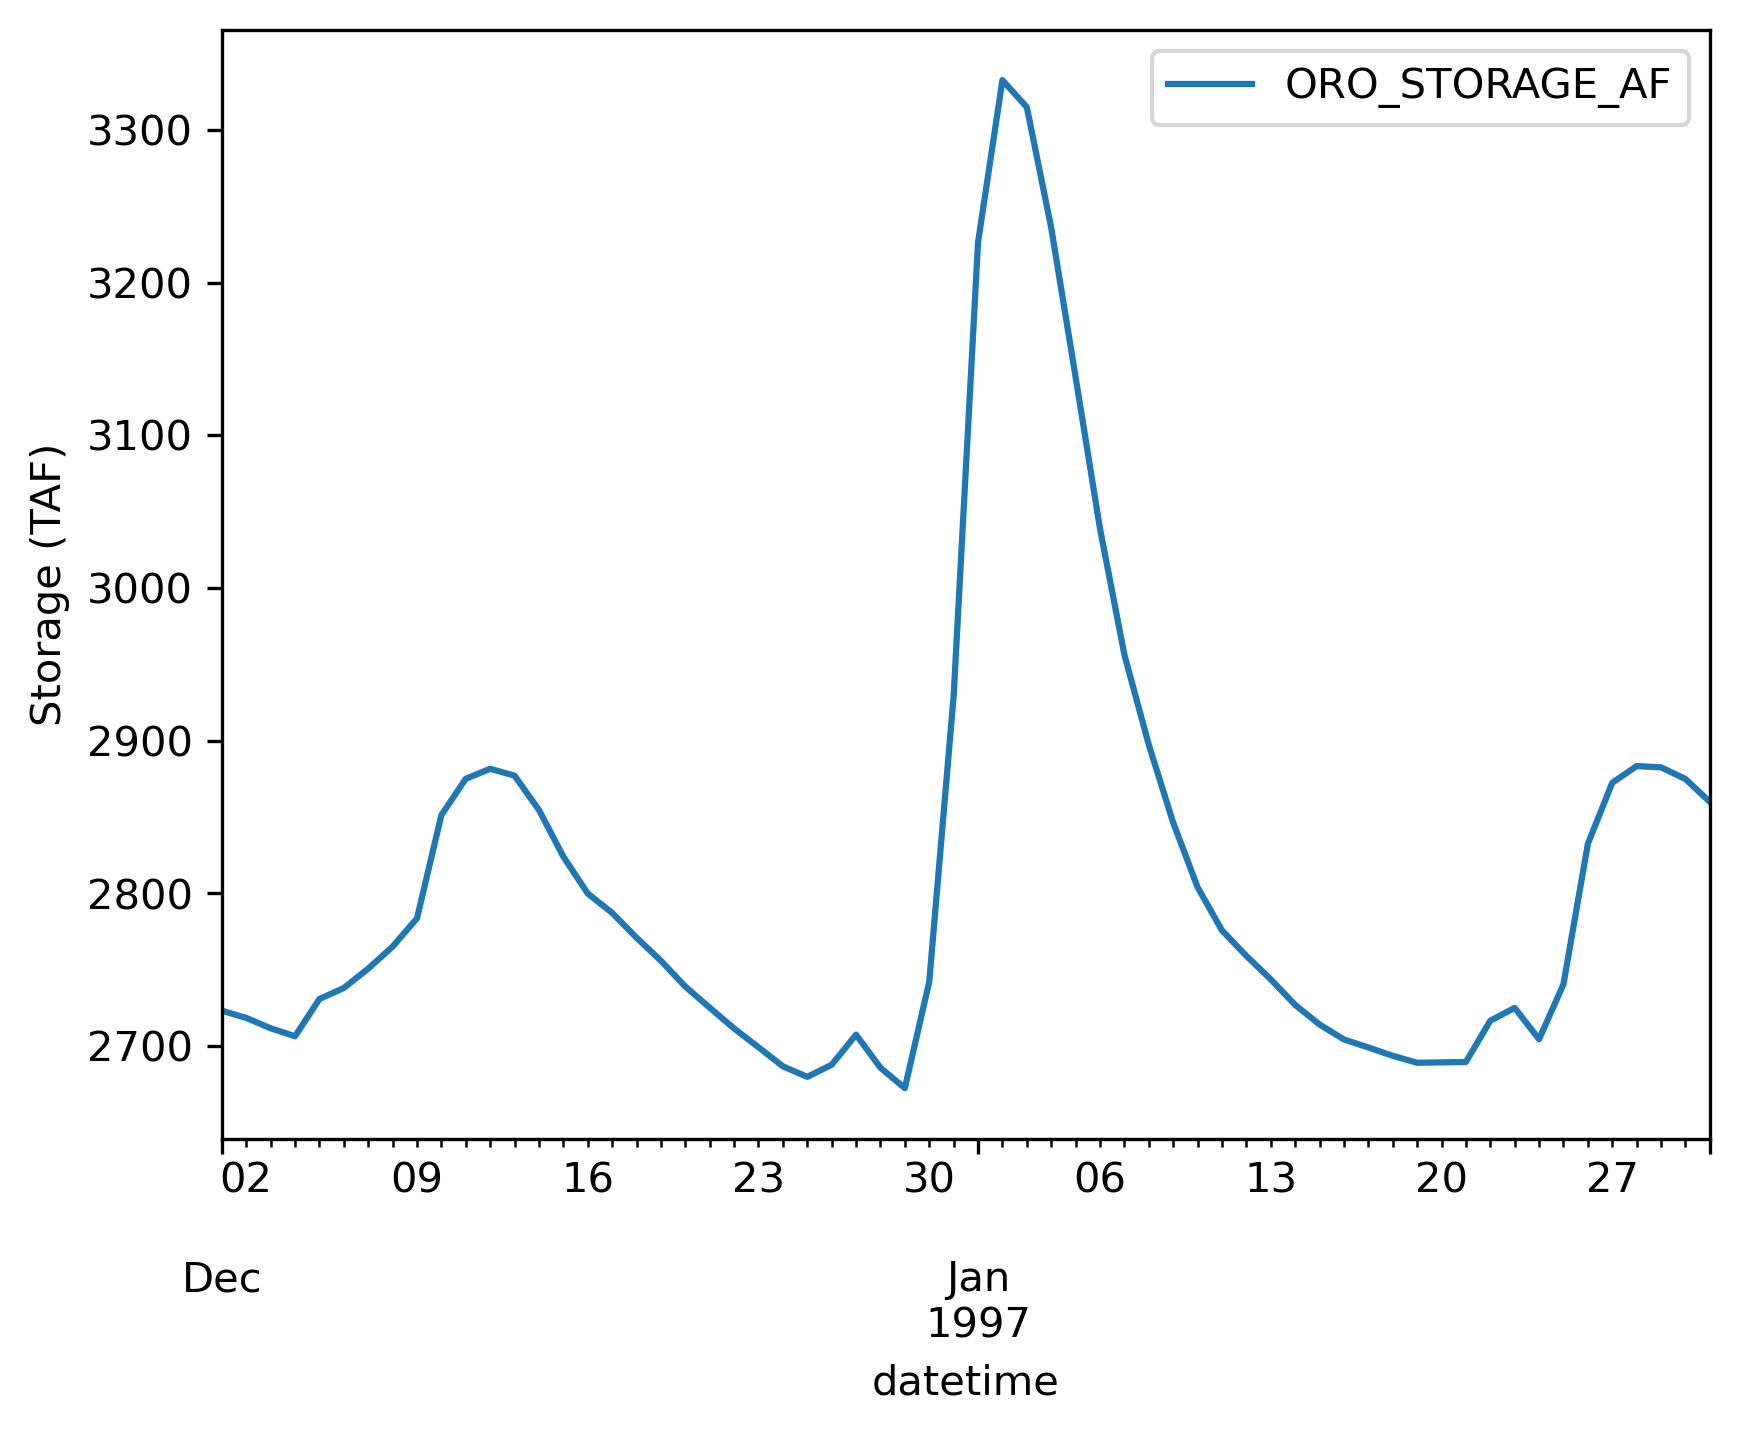

In [13]:
df = cdec_sensor_data('ORO', 15, 'D', sd='1996-12-01', ed='1997-01-31')
(df / 1000).plot()
plt.ylabel('Storage (TAF)')
plt.show()